In [1]:
import pandas as pd
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

df_P0_1k = pd.read_hdf("zwei_populationen.h5", key="P_0_1000")
df_P0_10k = pd.read_hdf("zwei_populationen.h5", key="P_0_10000")
df_P1 = pd.read_hdf("zwei_populationen.h5", key="P_1")

In [2]:
P0_1k = df_P0_10k.values
P0_10k = df_P0_1k.values
P1 = df_P1.values

muP0 = np.array([np.mean(P0_10k, axis=0)])
muP0 = np.transpose(muP0) # Now it is a proper column vector
muP1 = np.array([np.mean(P1, axis=0)])
muP1 = np.transpose(muP1)

In [11]:
covP0 = np.cov(P0_10k, ddof = 1, rowvar=False)
covP1 = np.cov(P1, ddof = 1, rowvar=False)
# is this the combined covariance matrix
Sw = covP0 + covP1
SwInv = linalg.inv(Sw)
Sb = np.dot(muP0-muP1, np.transpose(muP0-muP1))
matrix = np.dot(SwInv,Sb)
[d, V] = linalg.eig(matrix,right=True)
print(V)
w = V[:,1] # get first column
wstrich = np.dot(SwInv, muP0-muP1)
print(wstrich)
print(w)

[[ 0.62202305 -0.0339214 ]
 [-0.78299893  0.9994245 ]]
[[-1.21953973]
 [ 1.53514938]]
[-0.0339214  0.9994245]


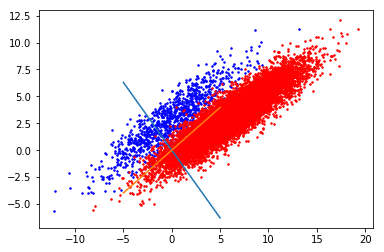

In [16]:
x0, y0 = zip(*P0_10k)
x1, y1 = zip(*P1)
linspace = np.linspace(-5,5,100)
plt.plot(x0, y0, 'b.', label='P0', markersize=3)
plt.plot(x1, y1, 'r.', label='P1', markersize=3)
plt.plot(linspace, wstrich[1]/wstrich[0]*linspace)
plt.plot(linspace, -wstrich[0]/wstrich[1]*linspace)
plt.show()